In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import (ConfusionMatrixDisplay, 
                            confusion_matrix, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            accuracy_score, 
                            classification_report)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from data_transform import ColumnDropper, CategorizerFeatures, OrdinalEncoderTransformer, OneHotEmbarkedAndPclassEncoder

In [2]:
df = pd.read_csv('dataset/titanicc/train.csv')

In [3]:
y = df['Survived']

In [4]:
colunas = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]

In [5]:
X = df[colunas]

In [6]:
X_test_final = pd.read_csv("dataset/titanicc/test.csv")

In [7]:
y_test_final = pd.read_csv('dataset/titanicc/gender_submission.csv')

In [8]:
y_test_final = y_test_final['Survived'].to_numpy()

In [9]:
ppl_transform = Pipeline([
    ('drop_columns', ColumnDropper(columns_to_drop=['Cabin', 'Name', 'Ticket'])),
    ('CategorizerFeatures', CategorizerFeatures()),
    ('ordinal_encoder', OrdinalEncoderTransformer(columns=['Sex'])),
    ('encoder', OneHotEmbarkedAndPclassEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()), 
])

In [10]:
logit = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty = 'l2')

rf = RandomForestClassifier(bootstrap = True, max_depth= None, max_features='sqrt', random_state = 42,
                           min_samples_leaf = 2, min_samples_split = 10, n_estimators = 75)

knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors =  5, weights = 'uniform')

voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', logit),
        ('rf', rf),
        ('knn', knn)
    ],
    voting='hard'  # 'hard' = votação majoritária, 'soft' = média das probabilidades
)

In [11]:
model_hard = make_pipeline(ppl_transform,voting_clf_hard)

In [12]:
model_hard.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('drop_columns',
                                  ColumnDropper(columns_to_drop=['Cabin',
                                                                 'Name',
                                                                 'Ticket'])),
                                 ('CategorizerFeatures', CategorizerFeatures()),
                                 ('ordinal_encoder',
                                  OrdinalEncoderTransformer(columns=['Sex'])),
                                 ('encoder', OneHotEmbarkedAndPclassEncoder()),
                                 ('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('scaler', StandardScaler())])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=1,
                                                                  max_iter=1000,
                                                                  solver='liblinear')),
                                              ('rf',
                                               RandomForestClassifier(min_samples_leaf=2,
                                                                      min_samples_split=10,
                                                                      n_estimators=75,
                                                                      random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(metric='manhattan'))]))])

In [13]:
y_pred_hard = model_hard.predict(X_test_final)

In [14]:
print("Acurácia:", accuracy_score(y_test_final, y_pred_hard))

Acurácia: 0.8181818181818182


In [15]:
print(classification_report(y_test_final, y_pred_hard))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       266
           1       0.73      0.80      0.76       152

    accuracy                           0.82       418
   macro avg       0.80      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



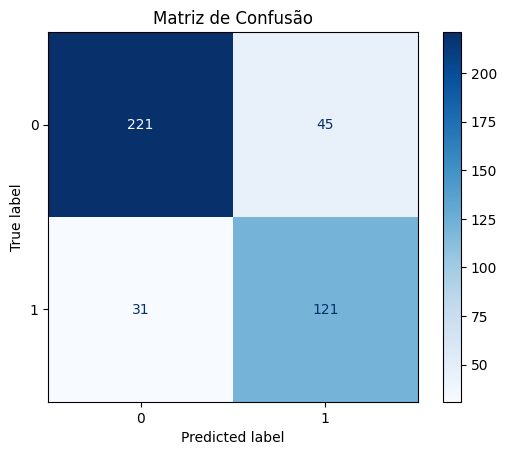

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test_final, y_pred_hard, cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

In [17]:
logit = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty = 'l2')

rf = RandomForestClassifier(bootstrap = True, max_depth= None, max_features='sqrt', random_state = 42,
                           min_samples_leaf = 2, min_samples_split = 10, n_estimators = 75)

knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors =  5, weights = 'uniform')

voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', logit),
        ('rf', rf),
        ('knn', knn)
    ],
    voting='soft'  # 'hard' = votação majoritária, 'soft' = média das probabilidades
)

In [18]:
model_soft = make_pipeline(ppl_transform,voting_clf_soft)

In [19]:
model_soft.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('drop_columns',
                                  ColumnDropper(columns_to_drop=['Cabin',
                                                                 'Name',
                                                                 'Ticket'])),
                                 ('CategorizerFeatures', CategorizerFeatures()),
                                 ('ordinal_encoder',
                                  OrdinalEncoderTransformer(columns=['Sex'])),
                                 ('encoder', OneHotEmbarkedAndPclassEncoder()),
                                 ('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('scaler', StandardScaler())])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=1,
                                                                  max_iter=1000,
                                                                  solver='liblinear')),
                                              ('rf',
                                               RandomForestClassifier(min_samples_leaf=2,
                                                                      min_samples_split=10,
                                                                      n_estimators=75,
                                                                      random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(metric='manhattan'))],
                                  voting='soft'))])

In [20]:
y_pred_soft = model_soft.predict(X_test_final)

In [21]:
print("Acurácia:", accuracy_score(y_test_final, y_pred_soft))

Acurácia: 0.8325358851674641


In [22]:
print(classification_report(y_test_final, y_pred_soft))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       266
           1       0.75      0.80      0.78       152

    accuracy                           0.83       418
   macro avg       0.82      0.83      0.82       418
weighted avg       0.84      0.83      0.83       418



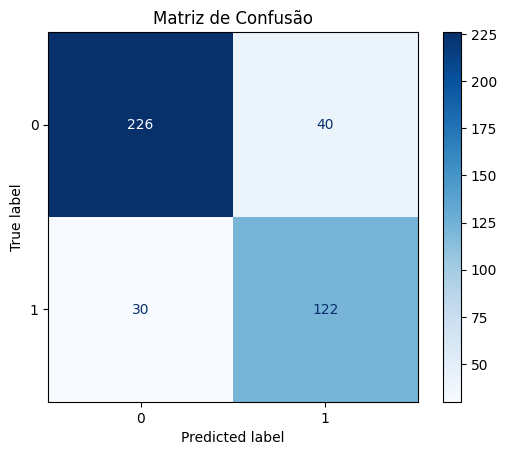

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test_final, y_pred_soft, cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()